#Predict the cultural difference based on the ingredients

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import nbinteract as nbi
from ipywidgets import interact
sb.set()

In [6]:
data = pd.read_json("train.json")


In [7]:
data.shape
#train_data.head()

(39774, 3)

In [8]:
train_data = pd.DataFrame(data[:30000])
test_data = pd.DataFrame(data[-9774:])
print("Train Set :", train_data.shape)
print("Test Set  :", test_data.shape)

Train Set : (30000, 3)
Test Set  : (9774, 3)


### Naive Bayes classification model





Prepare data

In [ ]:
train_data2 = train_data.copy()

In [ ]:
train_data2['ingredient'] = train_data2.ingredients.map(lambda x: ' '.join(x))
df = train_data2[['cuisine','ingredient']]
df.head()

,cuisine,ingredient
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

nb_count_vect = CountVectorizer()
nb_tfidf_transformer = TfidfTransformer()
X = nb_count_vect.fit_transform(df.ingredient)#get the word counts for the documents in a sparse matrix form.
X = nb_tfidf_transformer.fit_transform(X)#computing the ti-idf scores for your documents (tf*idf)


In [ ]:
# print idf values 
df_idf = pd.DataFrame(nb_tfidf_transformer.idf_, index=nb_count_vect.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])
#The lower the IDF value of a word, the less unique it is to any particular document

,idf_weights
salt,1.517212
oil,1.633466
pepper,1.726599
garlic,1.782595
ground,2.110819
...,...
spreadable,10.615839
ducklings,10.615839
membrillo,10.615839
evans,10.615839


Naive Bayes Classification model


In [ ]:
cuisine_train  = pd.DataFrame(df['cuisine'])
ingredient_train = pd.DataFrame(df['ingredient'])



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
scores = cross_val_score(MultinomialNB(), X, df.cuisine, cv=10)
sum=0
for score in scores:
  sum+= score
print("The goodness of fit of model on the train dataset, using cross-validation is: ", sum/10)

The goodness of fit of model on the train dataset, using cross-validation is:  0.6644


In [ ]:
mnb = MultinomialNB()
mnb.fit(X, df.cuisine)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

The goodness of fit of model on the train data set, using normal score is: 	: 0.6875333333333333


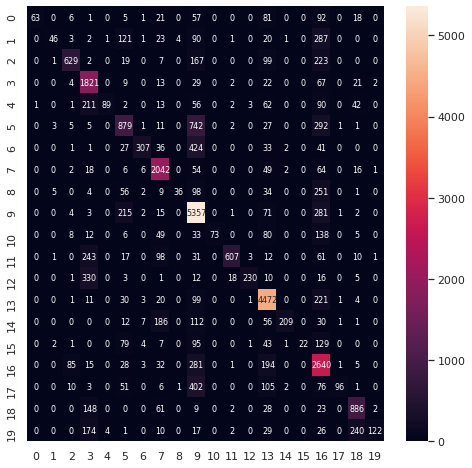

In [ ]:
cuisine_train_pred = mnb.predict(X)
print("The goodness of fit of model on the train data set, using normal score is: \t:", mnb.score(X, cuisine_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_train, cuisine_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})

In [ ]:
# cv = CountVectorizer(parameters desired)

# X_train = cv.fit_transform(train_data)

# X_test = cv.transform(test_data)

#### Check the goodness of fit on the test data:

The goodness of fit of model on the test data set, using normal score is: 	: 0.6668712911806834


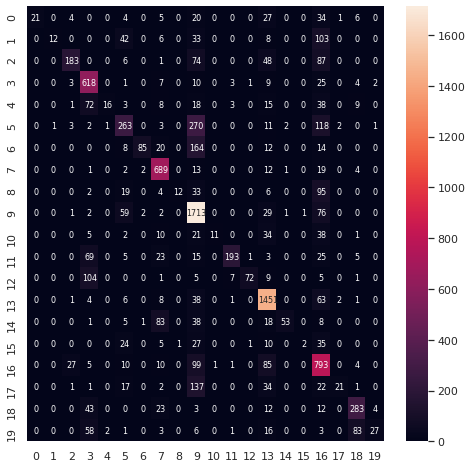

In [ ]:
test_data2 = test_data.copy()
test_data2['ingredient'] = test_data2.ingredients.map(lambda x: ' '.join(x))
df = test_data2[['cuisine','ingredient']]

Y = nb_count_vect.transform(df.ingredient) #get the word counts for the documents in a sparse matrix form.
Y = nb_tfidf_transformer.transform(Y) #computing the ti-idf scores for your documents (tf*idf). We use transform instead of fit_transform in test data
cuisine_test  = pd.DataFrame(df['cuisine'])
ingredient_test = pd.DataFrame(df['ingredient'])
cuisine_test_pred = mnb.predict(Y)
print("The goodness of fit of model on the test data set, using normal score is: \t:", mnb.score(Y, cuisine_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_test, cuisine_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score on Train is", accuracy_score(cuisine_train, cuisine_train_pred))
print("Accuracy Score on Test is", accuracy_score(cuisine_test, cuisine_test_pred))

Accuracy Score on Train is 0.6875333333333333
Accuracy Score on Test is 0.6668712911806834


In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(cuisine_test_pred, cuisine_test)

#Printing the accuracy
print("Accuracy of Naive Bayes : ", accuracy(cm))

Accuracy of Naive Bayes :  0.6668712911806834


##Decision Tree Classifier


###Train the data_train

In [ ]:
train_data2 = train_data.copy()
train_data2['ingredient'] = train_data2.ingredients.map(lambda x: ' '.join(x))
df = train_data2[['cuisine','ingredient']]
df.head()

,cuisine,ingredient
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dc_count_vect = CountVectorizer()
dc_tfidf_transformer = TfidfTransformer()
X = dc_count_vect.fit_transform(df.ingredient)#get the word counts for the documents in a sparse matrix form.
X = dc_tfidf_transformer.fit_transform(X)#computing the ti-idf scores for your documents (tf*idf)

In [ ]:
cuisine_train  = pd.DataFrame(df['cuisine'])
ingredient_train = pd.DataFrame(df['ingredient'])

The goodness of fit of Decision Tree on the train dataset, using cross-validation is:  [0.58733333 0.59616667 0.5885     0.58183333 0.58166667]
The goodness of fit of Decision Tree on the train data set, using normal score is: 	: 0.7758


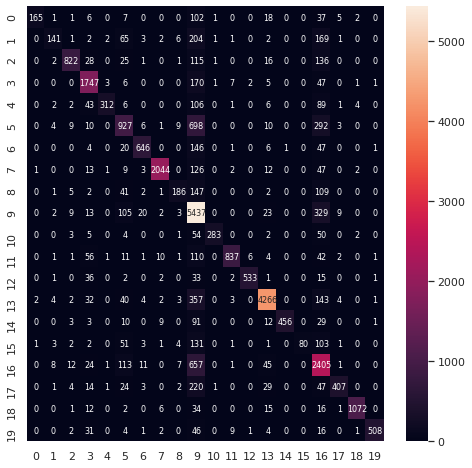

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 30)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dectree, X, df.cuisine, cv=5)
# sum=0
# for score in scores:
#   sum+= score
print("The goodness of fit of Decision Tree on the train dataset, using cross-validation is: ", scores) #sum/5))

dectree.fit(X, df.cuisine)
cuisine_train_pred = dectree.predict(X)
print("The goodness of fit of Decision Tree on the train data set, using normal score is: \t:", dectree.score(X, cuisine_train))
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_train, cuisine_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})


###Test the data_test

The goodness of fit of Decision Tree on the test dataset, using cross-validation is:  [0.53861893 0.5544757  0.53350384 0.57186701 0.56960082]
The goodness of fit of Decision Tree on the test data set, using normal score is: 	: 0.6045631266625742


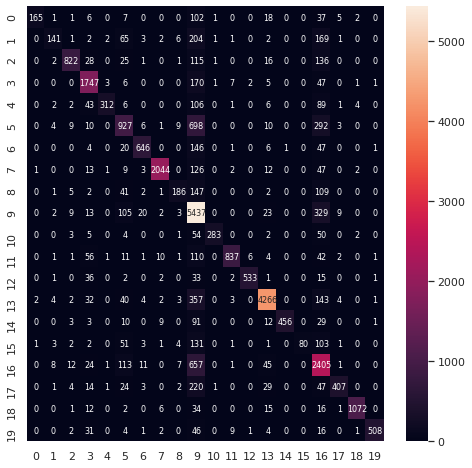

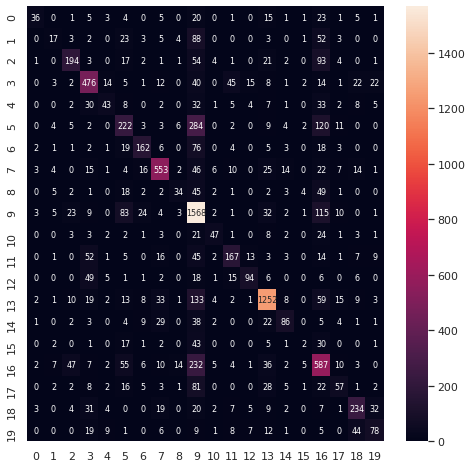

In [ ]:
test_data2 = test_data.copy()
test_data2['ingredient'] = test_data2.ingredients.map(lambda x: ' '.join(x))
df = test_data2[['cuisine','ingredient']]
X = dc_count_vect.transform(df.ingredient)#get the word counts for the documents in a sparse matrix form.
X = dc_tfidf_transformer.transform(X)#computing the ti-idf scores for your documents (tf*idf)
cuisine_test  = pd.DataFrame(df['cuisine'])
ingredient_test = pd.DataFrame(df['ingredient'])
cuisine_test_pred = dectree.predict(X) #predict the cuisine based on test data

from sklearn.model_selection import cross_val_score
scores = cross_val_score(dectree, X, df.cuisine, cv=5)
# sum=0
# for score in scores:
#   sum+= score
print("The goodness of fit of Decision Tree on the test dataset, using cross-validation is: ", scores) #sum/5))
print("The goodness of fit of Decision Tree on the test data set, using normal score is: \t:", dectree.score(X, cuisine_test))
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_train, cuisine_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})
from sklearn.metrics import confusion_matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_test, cuisine_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})

In [ ]:
from sklearn.metrics import accuracy_score
#print("Accuracy Score on Train is", accuracy_score(cuisine_train, cuisine_train_pred))
print("Accuracy Score on Test is", accuracy_score(cuisine_test, cuisine_test_pred))

Accuracy Score on Test is 0.6045631266625742


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(cuisine_test_pred, cuisine_test)

#Printing the accuracy
print("Accuracy of Decison Tree Classifier : ", accuracy(cm))

Accuracy of Decison Tree Classifier :  0.6045631266625742


##Random Forest 

In [ ]:
train_data2 = train_data.copy()
train_data2['ingredient'] = train_data2.ingredients.map(lambda x: ' '.join(x))
df = train_data2[['cuisine','ingredient']]
df.head()

,cuisine,ingredient
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

rf_count_vect = CountVectorizer()
rf_tfidf_transformer = TfidfTransformer()
X = rf_count_vect.fit_transform(df.ingredient)#get the word counts for the documents in a sparse matrix form.
X = rf_tfidf_transformer.fit_transform(X)#computing the ti-idf scores for your documents (tf*idf)

In [ ]:
cuisine_train  = pd.DataFrame(df['cuisine'])
ingredient_train = pd.DataFrame(df['ingredient'])

The goodness of fit of model on the train dataset, using cross-validation is:  [0.67783333 0.6845     0.68633333 0.67716667 0.67766667]
The goodness of fit of model on the train data set, using normal score is: 	: 0.9938666666666667


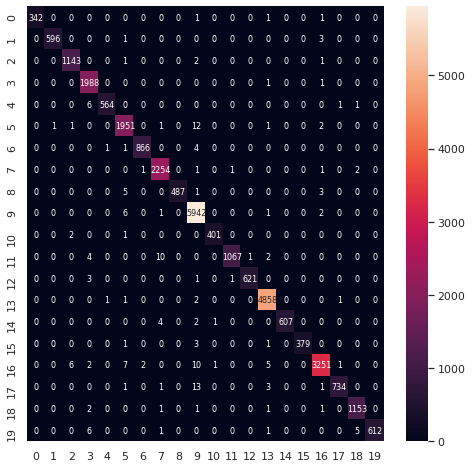

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create a Decision Tree Classifier object
rf = RandomForestClassifier(n_estimators=10)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, df.cuisine, cv=5)
# sum=0
# for score in scores:
#   sum+= score
print("The goodness of fit of model on the train dataset, using cross-validation is: ", scores) #sum/5))

rf.fit(X, df.cuisine)
cuisine_train_pred = rf.predict(X)
print("The goodness of fit of model on the train data set, using normal score is: \t:", rf.score(X, cuisine_train))
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_train, cuisine_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})


###Test on the test data

In [ ]:
test_data2 = test_data.copy()
test_data2['ingredient'] = test_data2.ingredients.map(lambda x: ' '.join(x))
df = test_data2[['cuisine','ingredient']]
X = rf_count_vect.transform(df.ingredient)#get the word counts for the documents in a sparse matrix form.
X = rf_tfidf_transformer.transform(X)#computing the ti-idf scores for your documents (tf*idf)
cuisine_test  = pd.DataFrame(df['cuisine'])
ingredient_test = pd.DataFrame(df['ingredient'])

cusine_test_pred = rf.predict(X)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, df.cuisine, cv=5)
# sum=0
# for score in scores:
#   sum+= score
print("The goodness of fit of model on the test dataset, using cross-validation is: ", scores) #sum/5))

rf.fit(X, df.cuisine)
print("The goodness of fit of model on the test data set, using normal score is: \t:", rf.score(X, cuisine_test))

The goodness of fit of model on the test dataset, using cross-validation is:  [0.62659847 0.63478261 0.61790281 0.64808184 0.63357216]
The goodness of fit of model on the test data set, using normal score is: 	: 0.9937589523224882


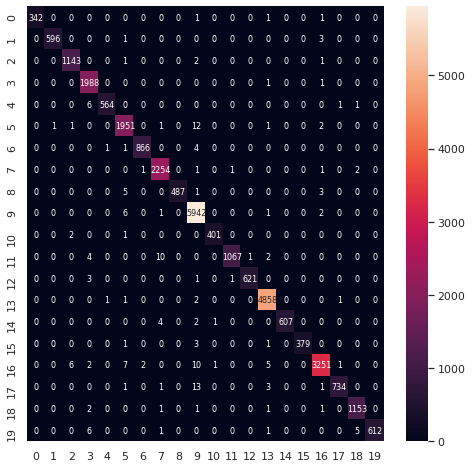

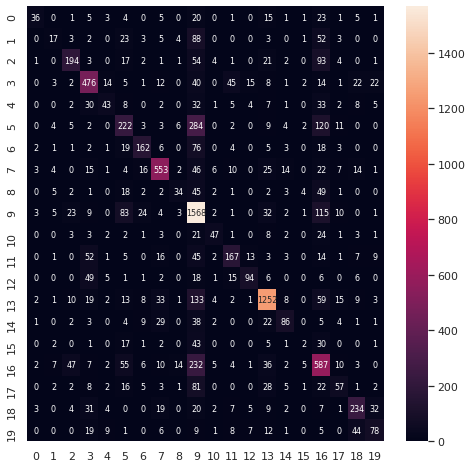

In [ ]:
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_train, cuisine_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})
from sklearn.metrics import confusion_matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_test, cuisine_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score on Train is", accuracy_score(cuisine_train, cuisine_train_pred))
print("Accuracy Score on Test is", accuracy_score(cuisine_test, cuisine_test_pred))

Accuracy Score on Train is 0.9938666666666667
Accuracy Score on Test is 0.6045631266625742


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(cuisine_test_pred, cuisine_test)

#Printing the accuracy
print("Accuracy of Random Forest : ", accuracy(cm))

Accuracy of Random Forest :  0.6045631266625742


##Neural Network - MLP


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier (solver = 'adam', alpha=0.001, hidden_layer_sizes=(100,100,100), random_state=1, activation='logistic' ,early_stopping = True); #solver  = 'adam'

In [ ]:
train_data2 = train_data.copy()
train_data2['ingredient'] = train_data2.ingredients.map(lambda x: ' '.join(x))
df = train_data2[['cuisine','ingredient']]
df.head()

,cuisine,ingredient
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dc_count_vect = CountVectorizer()
dc_tfidf_transformer = TfidfTransformer()
X = dc_count_vect.fit_transform(df.ingredient)#get the word counts for the documents in a sparse matrix form.
X = dc_tfidf_transformer.fit_transform(X)#computing the ti-idf scores for your documents (tf*idf)

In [ ]:
cuisine_train  = pd.DataFrame(df['cuisine'])
ingredient_train = pd.DataFrame(df['ingredient'])

In [ ]:
clf.fit(X, df.cuisine)

print("Voting fit")   
cuisine_train_pred = clf.predict(X)
print("Voting predict")


Voting fit
Voting predict


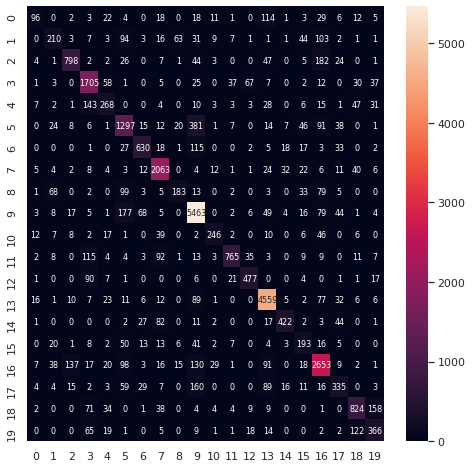

In [ ]:
f = plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(cuisine_train, cuisine_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})

In [ ]:
scores = cross_val_score(clf, X, df.cuisine, cv=5)
print("Accuracy is:", scores)

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(cuisine_train_pred, cuisine_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.7851


In [10]:
def f(x):
    return x

In [11]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [13]:
nbi.multiple_choice(question="What is the most popular ingredients?",
                    choices=['Salt', 'Olive Oil', 'Vegetable Oil'],
                    answers=0)